In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv("/content/archive (9).zip")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df= data.loc[:,['bedrooms','bathrooms','floors' ,'waterfront','grade','condition','yr_built','view','yr_renovated','price']]
print(df)

       bedrooms  bathrooms  floors  waterfront  grade  condition  yr_built  \
0             3       1.00     1.0           0      7          3      1955   
1             3       2.25     2.0           0      7          3      1951   
2             2       1.00     1.0           0      6          3      1933   
3             4       3.00     1.0           0      7          5      1965   
4             3       2.00     1.0           0      8          3      1987   
...         ...        ...     ...         ...    ...        ...       ...   
21608         3       2.50     3.0           0      8          3      2009   
21609         4       2.50     2.0           0      8          3      2014   
21610         2       0.75     2.0           0      7          3      2009   
21611         3       2.50     2.0           0      8          3      2004   
21612         2       0.75     2.0           0      7          3      2008   

       view  yr_renovated     price  
0         0             0

In [9]:
data = data.dropna()
data = data.drop(['id', 'date', 'zipcode'], axis=1)


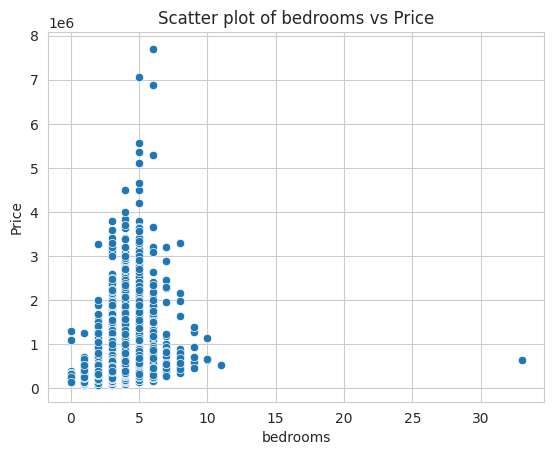

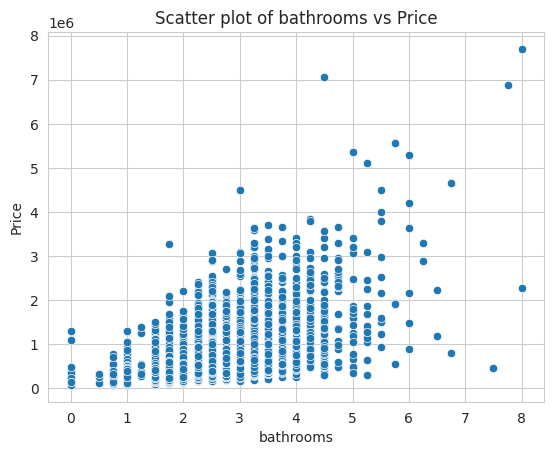

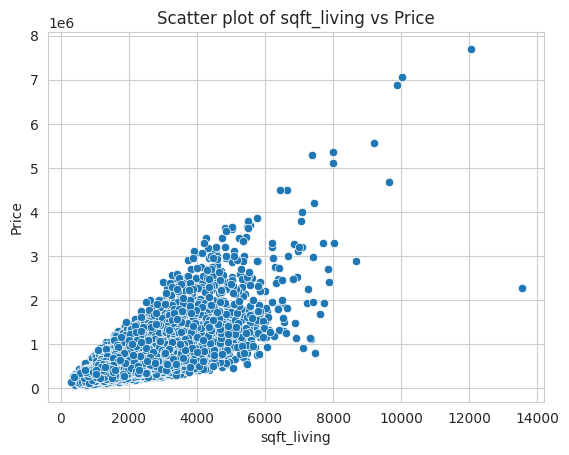

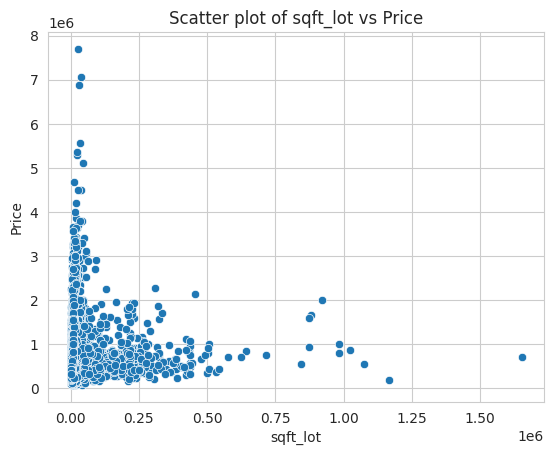

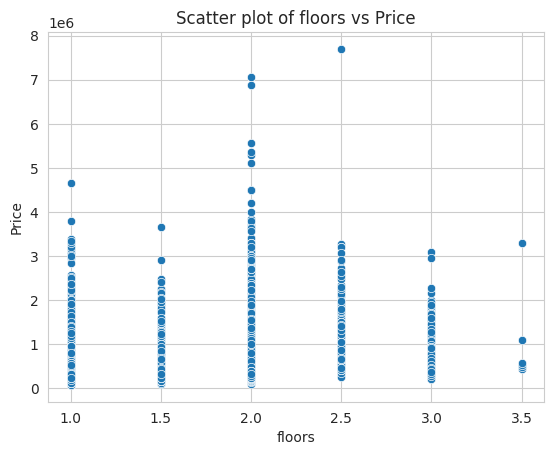

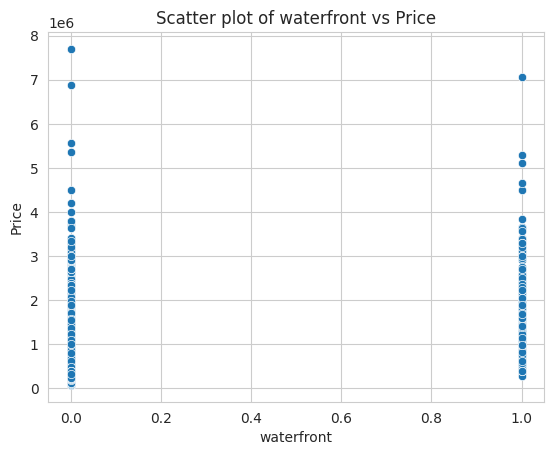

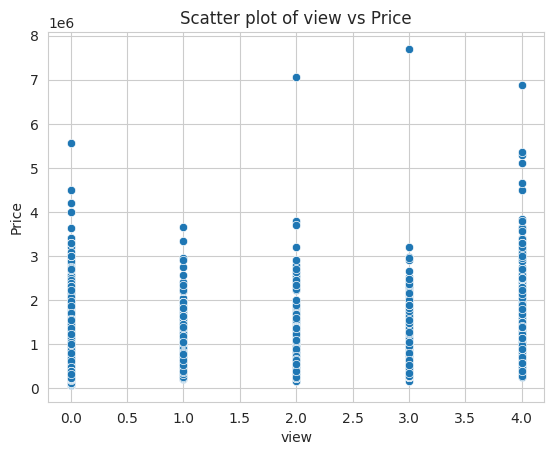

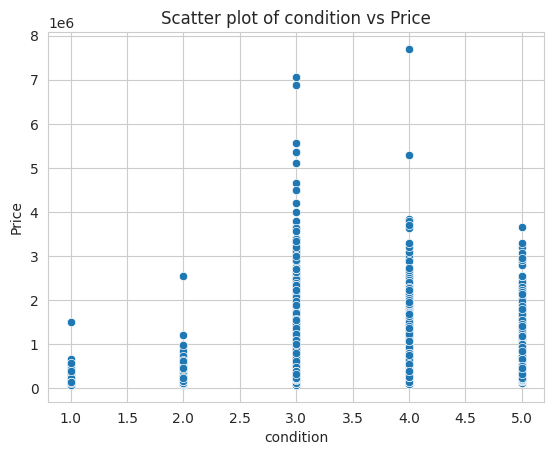

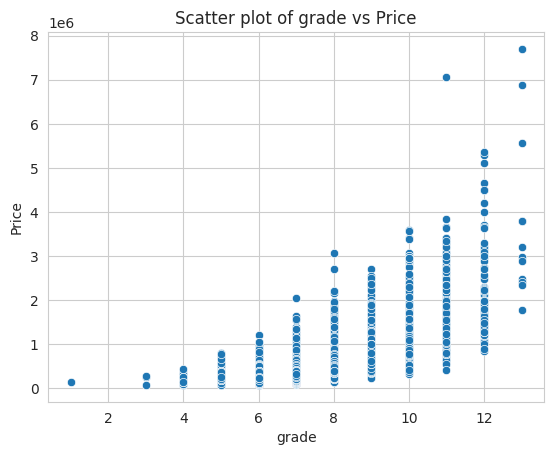

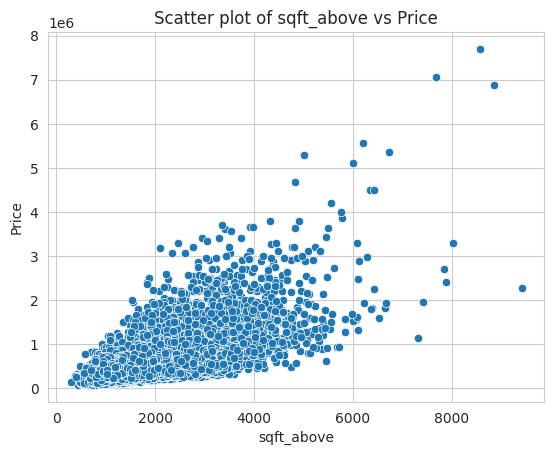

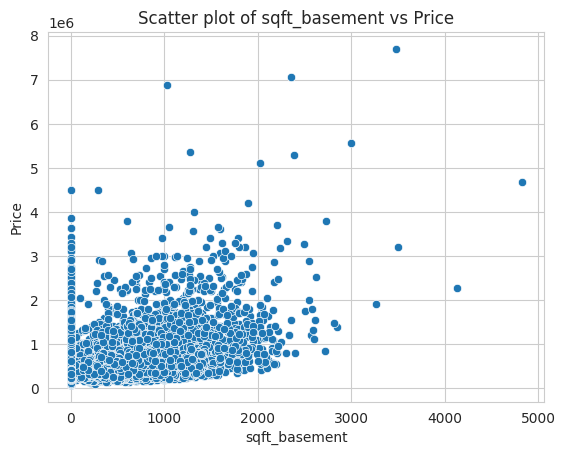

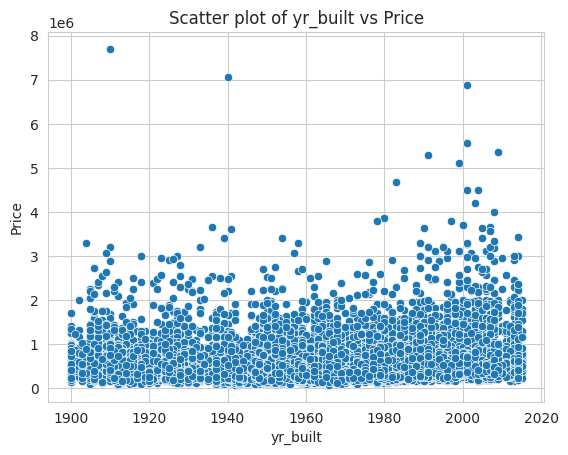

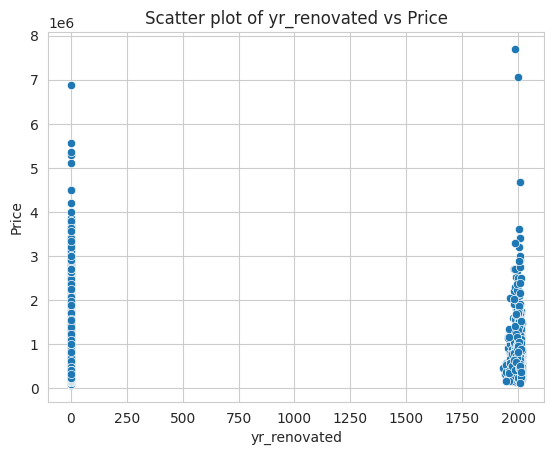

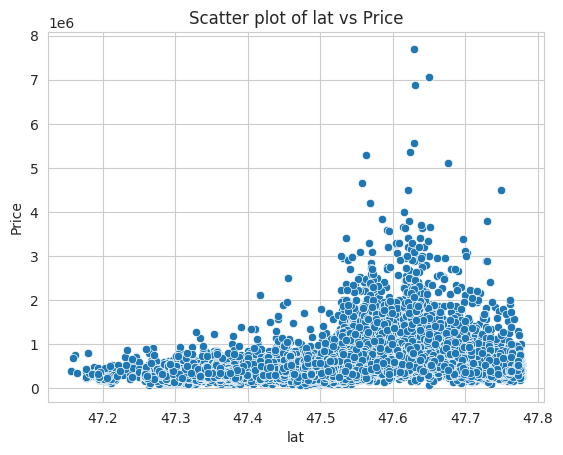

In [ ]:
sns.set_style("whitegrid")
for column in data.columns:
    if column != 'price':
        sns.scatterplot(x=data[column], y=data['price'])
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'Scatter plot of {column} vs Price')
        plt.show()

In [ ]:
# Heatmap of the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Box plot for the number of bedrooms
sns.boxplot(x=data['bedrooms'], y=data['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box plot of Price vs Number of Bedrooms')
plt.show()

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2,random_state=42)

In [ ]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
# Predict and evaluate the Linear Regression model
y_pred_lr = linear_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error: {lr_mse:.2f}')
print(f'Linear Regression - R-squared: {lr_r2:.2f}')

In [ ]:
# Initialize the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42, max_depth=9)

# Train the Decision Tree Regressor model
tree_model.fit(X_train, y_train)

# Predict and evaluate the Decision Tree Regressor model
dt_train_r2 = r2_score(y_train, tree_model.predict(X_train)) * 100
dt_test_r2 = r2_score(y_test, tree_model.predict(X_test)) * 100
dt_train_mse = mean_squared_error(y_train, tree_model.predict(X_train))
dt_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))

print(f'Decision Tree - R² score for train: {dt_train_r2:.2f}')
print(f'Decision Tree - R² score for test: {dt_test_r2:.2f}')
print(f'Decision Tree - Mean Squared Error for train: {dt_train_mse:.2f}')
print(f'Decision Tree - Mean Squared Error for test: {dt_test_mse:.2f}')

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_scaler, y, cv=15)
cv_mean = cv_scores.mean() * 100

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_mean:.2f}')